In [1]:
import os

# Limit the number of threads for various libraries
os.environ["MKL_NUM_THREADS"] = "12"  # For MKL (used by NumPy)
os.environ["NUMEXPR_NUM_THREADS"] = "12"  # For NumExpr
os.environ["VECLIB_MAXIMUM_THREADS"] = "12"  # For macOS Accelerate
os.environ["OPENBLAS_NUM_THREADS"] = "12"  # For OpenBLAS
os.environ["BLIS_NUM_THREADS"] = "12"  # For BLIS

# Print environment variables to verify
print("OMP_NUM_THREADS:", os.environ.get("OMP_NUM_THREADS"))
print("MKL_NUM_THREADS:", os.environ.get("MKL_NUM_THREADS"))
print("NUMEXPR_NUM_THREADS:", os.environ.get("NUMEXPR_NUM_THREADS"))
print("VECLIB_MAXIMUM_THREADS:", os.environ.get("VECLIB_MAXIMUM_THREADS"))
print("OPENBLAS_NUM_THREADS:", os.environ.get("OPENBLAS_NUM_THREADS"))
print("BLIS_NUM_THREADS:", os.environ.get("BLIS_NUM_THREADS"))

# Set PyTorch threads
import torch
torch.set_num_threads(18)
torch.set_num_interop_threads(18)

OMP_NUM_THREADS: None
MKL_NUM_THREADS: 12
NUMEXPR_NUM_THREADS: 12
VECLIB_MAXIMUM_THREADS: 12
OPENBLAS_NUM_THREADS: 12
BLIS_NUM_THREADS: 12


In [2]:
%cd ../..

/data/users/rodalex/Computational-Analysis-of-Moonlighting-Proteins


In [3]:
# WrappedProteinDataset & PCAExplainability - Usage Demo
# ======================================================
# This notebook demonstrates how to use WrappedProteinDataset and PCAExplainability
# to perform dimensionality reduction and interpret protein embedding data.

from project_root.dataset.dataset_loader import DatasetLoader
from project_root.dataset.protein_dataset import ProteinDataset
from project_root.dataset.wrapped_protein_dataset import WrappedProteinDataset
from project_root.utils.visualization import DataVisualizer

from torch.utils.data import DataLoader, TensorDataset

from project_root.dataset.protein_dataset import ProteinDataset
from project_root.dataset.wrapped_protein_dataset import WrappedProteinDataset
from project_root.models.protein_classifier import ProteinClassifier
from project_root.training.trainer import Trainer

# ------------------------------------------------------
# 📥 1. Load Dataset and Embeddings
# ------------------------------------------------------

# Define data path
path_dataset_folder = "../DATASETS/"

# Load data
loader = DatasetLoader(path_dataset_folder)
df = loader.load_dataframe()
embeddings, attention_weights = loader.load_embeddings_and_attention()

# Create ProteinDataset instance
protein_dataset = ProteinDataset(df, embeddings, attention_weights, solve_inconsistencies=True)

/data/users/rodalex/software/miniconda3/envs/prot_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(877, 877)
(877, 877)
(1598, 1598)
(723, 723)
(723, 723)
(723, 723)
(723, 723)
(918, 918)
(918, 918)
(431, 431)
(431, 431)
(431, 431)
(431, 431)
(396, 396)
(396, 396)
(944, 944)
(944, 944)
(1077, 1077)
(1077, 1077)
(696, 696)
(696, 696)
(696, 696)
(696, 696)
(1248, 1248)
(548, 548)
(548, 548)
(548, 548)
(548, 548)
(548, 548)
(548, 548)
(548, 548)
(548, 548)
(760, 760)
(760, 760)
(760, 760)
(760, 760)
(315, 315)
(1294, 1294)
(467, 467)
(467, 467)
(83, 83)
(561, 561)
(857, 857)
(857, 857)
(857, 857)
(857, 857)
(857, 857)
(857, 857)
(857, 857)
(857, 857)
(718, 718)
(718, 718)
(718, 718)
(718, 718)
(718, 718)
(718, 718)
(718, 718)
(718, 718)
(870, 870)
(870, 870)
(870, 870)
(870, 870)
(1245, 1245)
(1245, 1245)
(1245, 1245)
(1245, 1245)
(898, 898)
(898, 898)
(898, 898)
(898, 898)
(898, 898)
(898, 898)
(898, 898)
(898, 898)
(819, 819)
(819, 819)
(819, 819)
(819, 819)
(819, 819)
(819, 819)
(819, 819)
(819, 819)
(1142, 1142)
(1142, 1142)
(1142, 1142)
(1142, 1142)
(314, 314)
(314, 314)
(314, 31

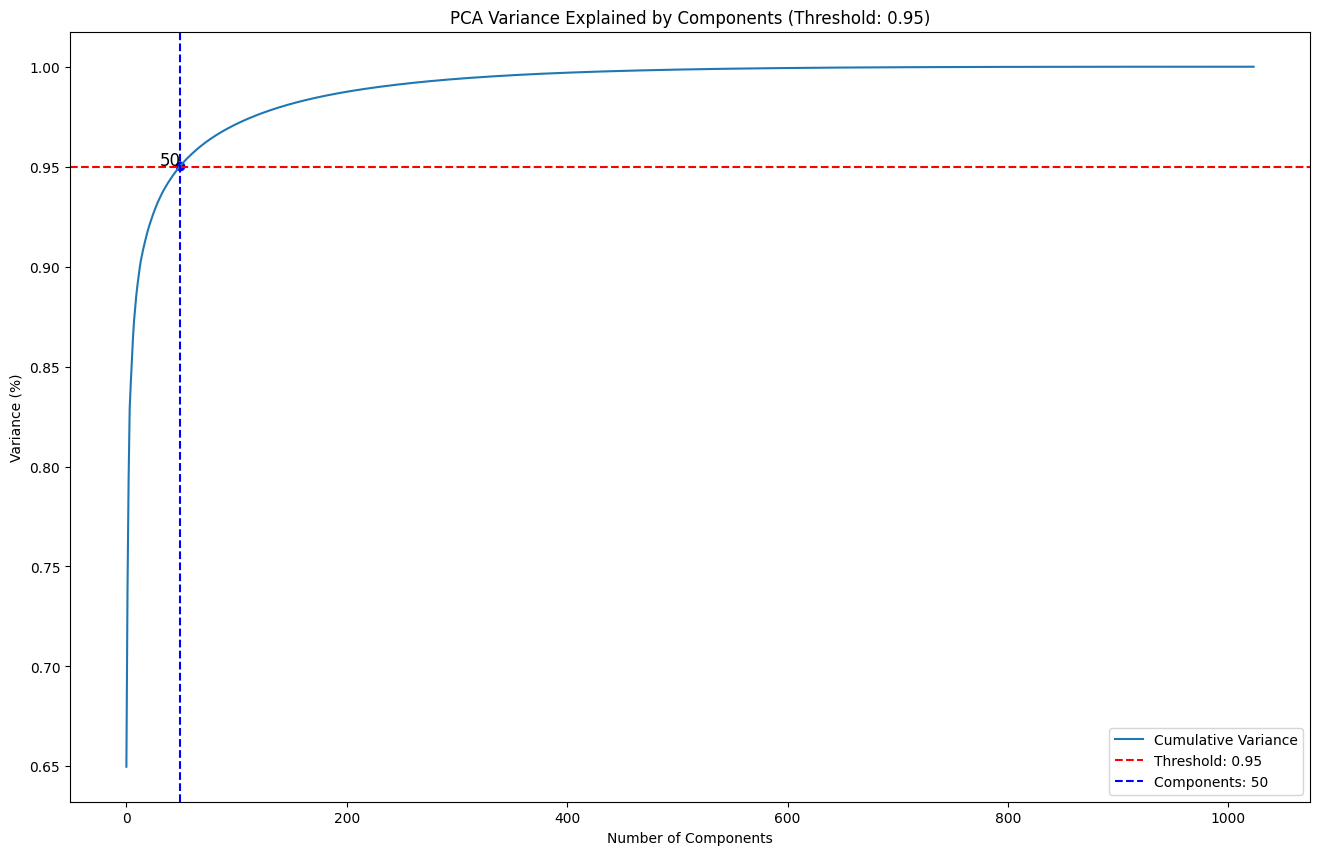

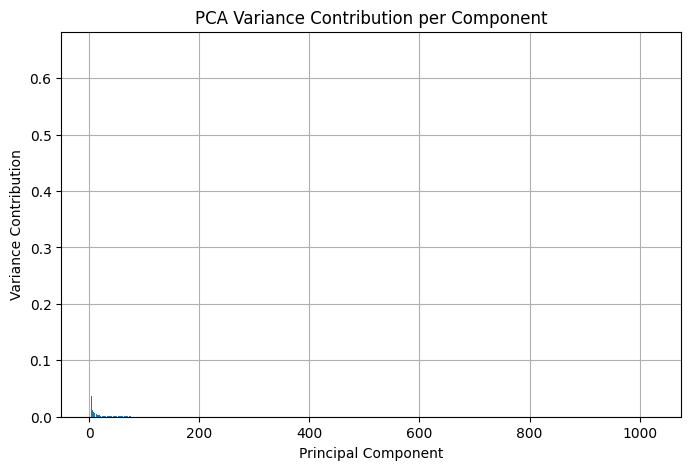

In [10]:
from sklearn.decomposition import PCA

# Apply PCA to the embeddings
original_embeddings = protein_dataset.get_embeddings()

# Create the PCA object
n_components = min(len(original_embeddings), len(original_embeddings[0]))
pca = PCA(n_components=n_components)

# Fit the PCA object and transform the data
original_embeddings_pca = pca.fit_transform(original_embeddings)

# Data Visualizer
DataVisualizer.plot_variance_explained(pca)  # Pass the PCA object
DataVisualizer.plot_variance_contribution(pca)  # Pass the PCA object

In [4]:
# ------------------------------------------------------
# 🧪 2. Create WrappedProteinDataset with Configurations
# ------------------------------------------------------

wrapped_dataset = WrappedProteinDataset(
    dataset=protein_dataset,
    process_attention_weights=False,
    reduce_method='pca',              # or 'tsne'
    pca_method='threshold',           # 'threshold', 'derivative', 'custom'
    threshold=0.95,
    random_projection_dim=50        # Random projection dim before PCA on attention weights
)

Converting embeddings and attention weights to NumPy arrays...
Applying dimensionality reduction using pca...


In [ ]:
data_comb = wrapped_dataset.select_data(embedding = True, 
                                   attention_weights = True, 
                                   additional_columns = ['Max_MBL_CC', 'Max_MBL_MF', 'Highest_MBL']
                                   )

data_att = wrapped_dataset.select_data(embedding = False,
                                      attention_weights = True,
                                      additional_columns = ['Max_MBL_CC', 'Max_MBL_MF', 'Highest_MBL']
                                      )

In [5]:
data_emb = wrapped_dataset.select_data(embedding = True,
                                   attention_weights = False,
                                   additional_columns = ['Max_MBL_CC', 'Max_MBL_MF', 'Highest_MBL']
                                   )


Adding additional columns to data...
Shape data before adding: (1219, 50) | Shape column: (1219, 1)
Shape data before adding: (1219, 51) | Shape column: (1219, 1)
Shape data before adding: (1219, 52) | Shape column: (1219, 1)
Final data shape: (1219, 53)


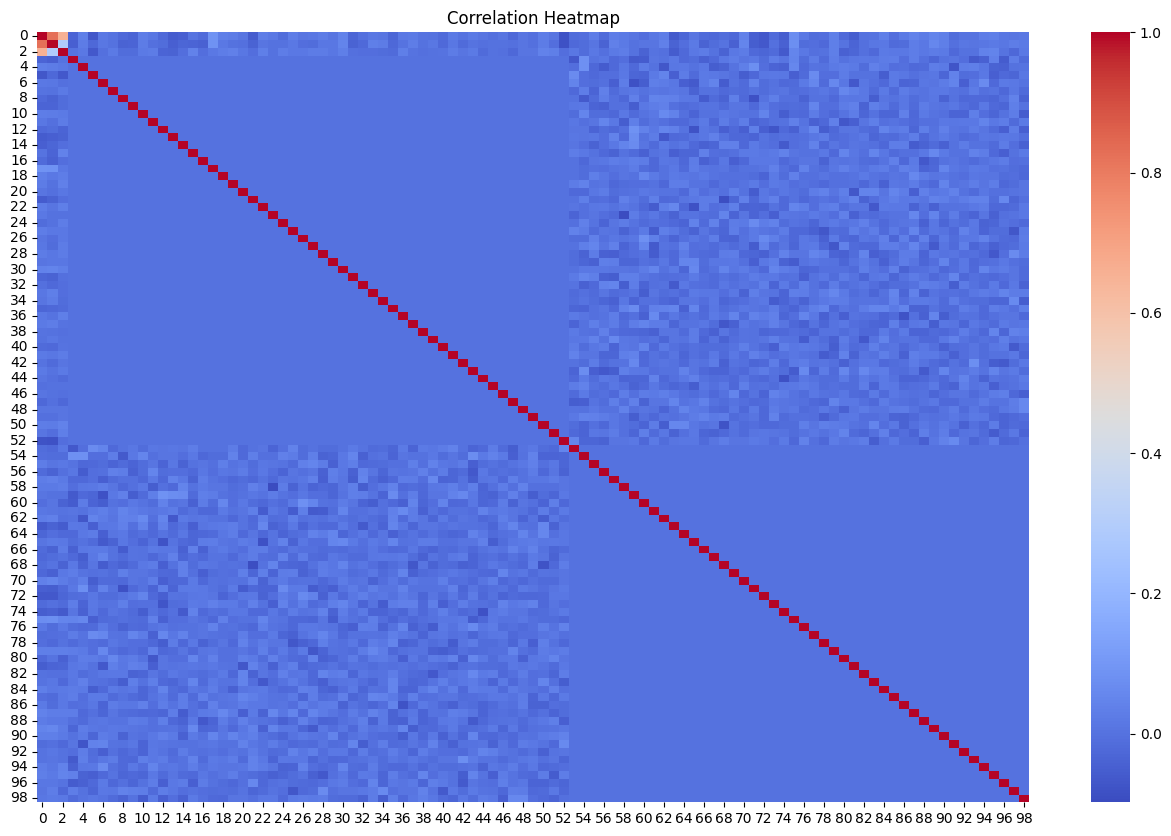

In [11]:
DataVisualizer.plot_correration_heatmap(data_comb)

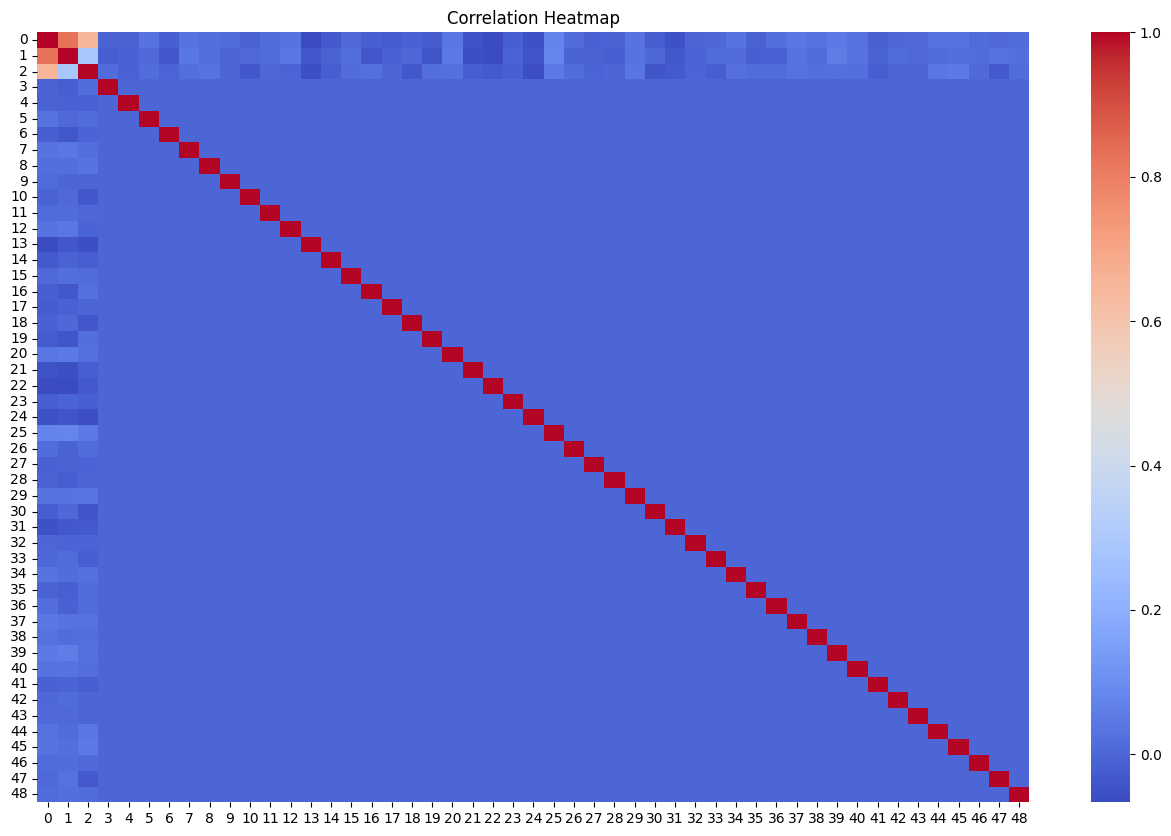

In [12]:
DataVisualizer.plot_correration_heatmap(data_att)

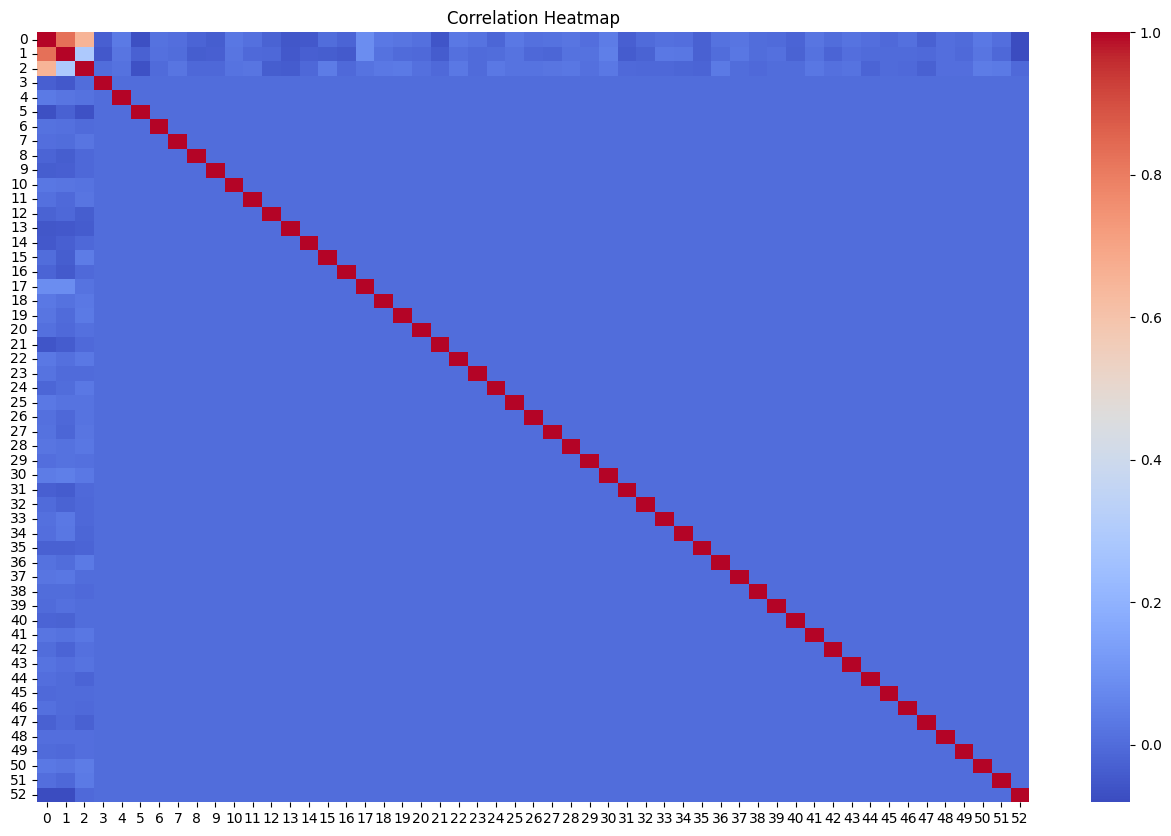

In [ ]:
DataVisualizer.plot_correration_heatmap(data_emb)

In [14]:

def train_model(data, num_epochs=200, seed=2025):

    # Set random seed for reproducibility
    torch.manual_seed(seed)

    # -----------------------------------------
    # 🧪 Prepare dataloaders
    # -----------------------------------------
    X = torch.tensor(data, dtype=torch.float32)
    y = torch.tensor(protein_dataset.get_labels(), dtype=torch.float32)

    dataset = TensorDataset(X, y)
    split = int(0.6 * len(dataset))
    train_dataset, test_dataset = torch.utils.data.random_split(dataset, [split, len(dataset) - split])

    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=16)

    # -----------------------------------------
    # 🧠 Build and train model
    # -----------------------------------------
    input_size = X.shape[1]
    model_fn = lambda size: ProteinClassifier(
        device=torch.device("cuda" if torch.cuda.is_available() else "cpu"),
        input_size=input_size,
        output_size=1,
        num_hidden_layers=1,
        hidden_layers_mode='quadratic_increase'
    )

    trainer = Trainer(model_class=model_fn)
    train_losses, val_losses, train_accs, val_accs = trainer.train_and_validate(train_loader, test_loader, num_epochs=num_epochs)

    # -----------------------------------------
    # 📈 Visualize results and evaluate
    # -----------------------------------------
    trainer.plot_results(train_losses, val_losses, train_accs, val_accs)
    trainer.evaluate_and_plot_confusion_matrix(test_loader)

    print("✅ ProteinClassifier + Trainer test complete")

    return trainer, train_dataset, test_dataset


Layer (type:depth-idx)                   Output Shape              Param #
ProteinClassifier                        [1, 1]                    --
├─Sequential: 1-1                        [1, 1]                    --
│    └─Linear: 2-1                       [1, 26]                   1,404
│    └─ReLU: 2-2                         [1, 26]                   --
│    └─Dropout: 2-3                      [1, 26]                   --
│    └─Linear: 2-4                       [1, 1]                    27
Total params: 1,431
Trainable params: 1,431
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.01
Estimated Total Size (MB): 0.01
Epoch 1, Training Loss: 0.7985, Validation Loss: 0.7849, Training Accuracy: 0.2791, Validation Accuracy: 0.2602
Epoch 2, Training Loss: 0.7813, Validation Loss: 0.7684, Training Accuracy: 0.2654, Validation Accuracy: 0.2398
Epoch 3, Training Loss: 0.7695, Validation Loss: 0.7531, Training Acc

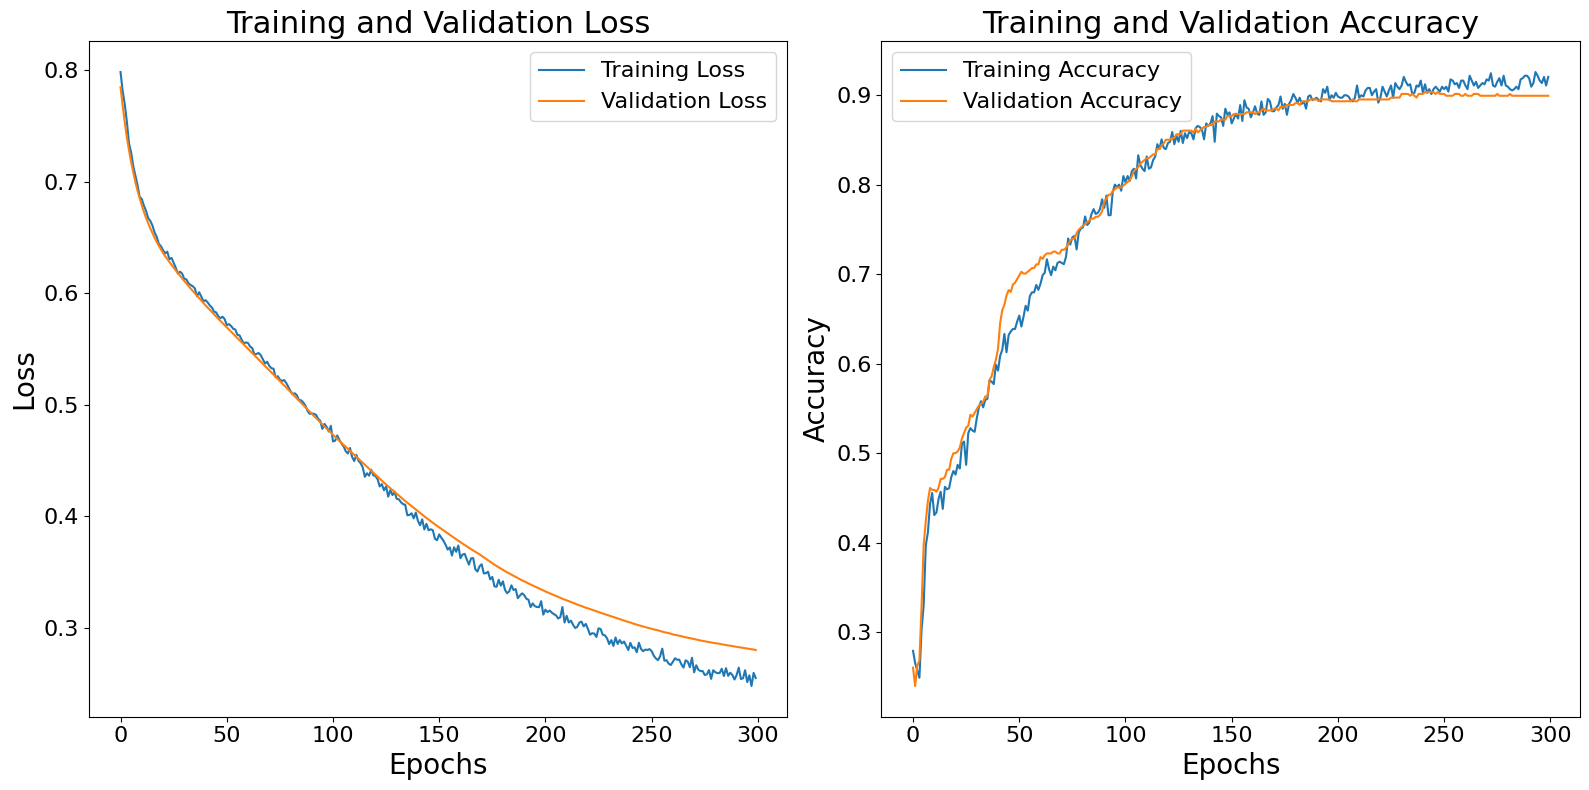

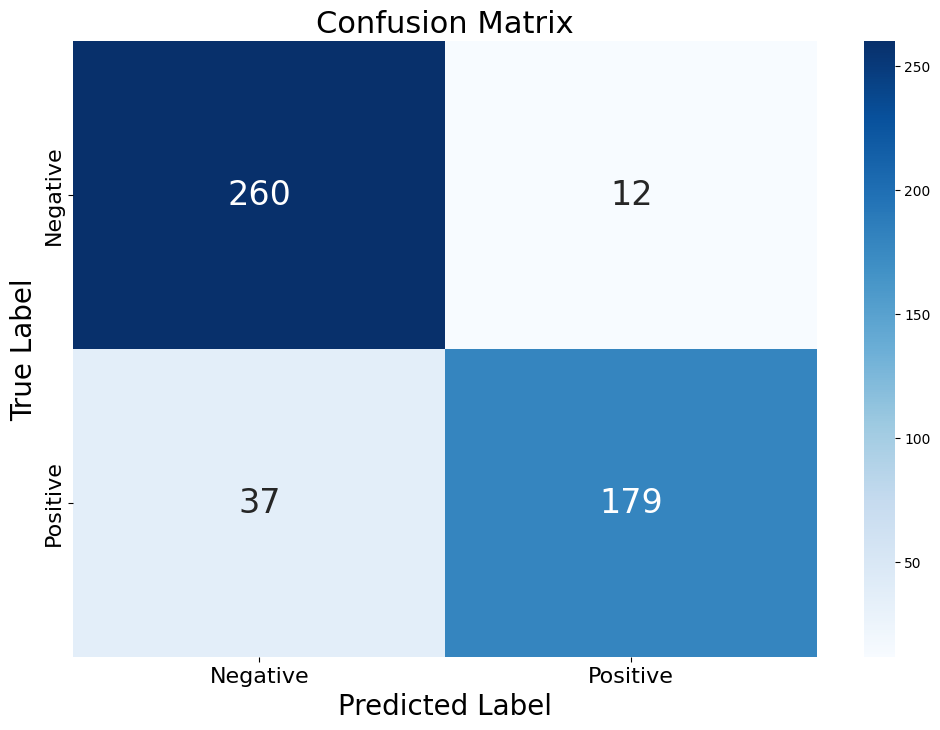


Métricas de Evaluación:
              precision    recall  f1-score   support

    Negative       0.88      0.96      0.91       272
    Positive       0.94      0.83      0.88       216

    accuracy                           0.90       488
   macro avg       0.91      0.89      0.90       488
weighted avg       0.90      0.90      0.90       488

Especificidad: 0.9559
Estadístico Kappa: 0.7940
✅ ProteinClassifier + Trainer test complete


In [15]:
trainer, train_dataset, test_dataset = train_model(data_emb, num_epochs=300)

In [18]:
from project_root.explainability.model_explainability import ModelExplainability

# ------------------------------------------------------
# 🧠 Explainability Analysis
# ------------------------------------------------------

def run_explainability_analysis(trainer, dataloader, num_samples=10):
    """
    Run SHAP, Layer Activations, Integrated Gradients, and Grad-CAM
    on a subset of the provided dataloader.

    Parameters:
    - trainer: the Trainer instance (must have a trained model)
    - dataloader: DataLoader with data for explanation
    - num_samples: how many samples to use for SHAP and IG
    """
    device = trainer.device

    # Get sample batch
    for x_batch, y_batch in dataloader:
        x = x_batch[:num_samples].to(device)
        y = y_batch[:num_samples]
        break

    # Initialize explainer
    explainer = ModelExplainability(model=trainer.model, device=device, input_example=x[:1])

    # SHAP
    print("\n🔍 SHAP Summary Plot:")
    shap_values = explainer.explain_with_shap(background_data=x, test_data=x, plot_summary=True)

    # Activations
    print("\n🧠 Layer Activations:")
    explainer.visualize_layer_activations(input_tensor=x)

    # Integrated Gradients
    print("\n⚡ Integrated Gradients:")
    explainer.explain_with_integrated_gradients(input_tensor=x[:1], target_class=0)

    # Grad-CAM
    print("\n🔥 Grad-CAM (Trying all linear layers):")
    linear_layers = [i for i, l in enumerate(trainer.model.classifier) if isinstance(l, torch.nn.Linear)]
    for idx in linear_layers:
        try:
            print(f"→ Layer {idx}")
            explainer.explain_with_gradcam(input_tensor=x[:1], target_class=0, layer_index=idx)
        except Exception as e:
            print(f"  [Skipped] {e}")


# ------------------------------------------------------
# Run Explainability (Optional)
# ------------------------------------------------------

# Example usage after training:
# run_explainability_analysis(trainer, test_loader, num_samples=10)



🔍 SHAP Summary Plot:


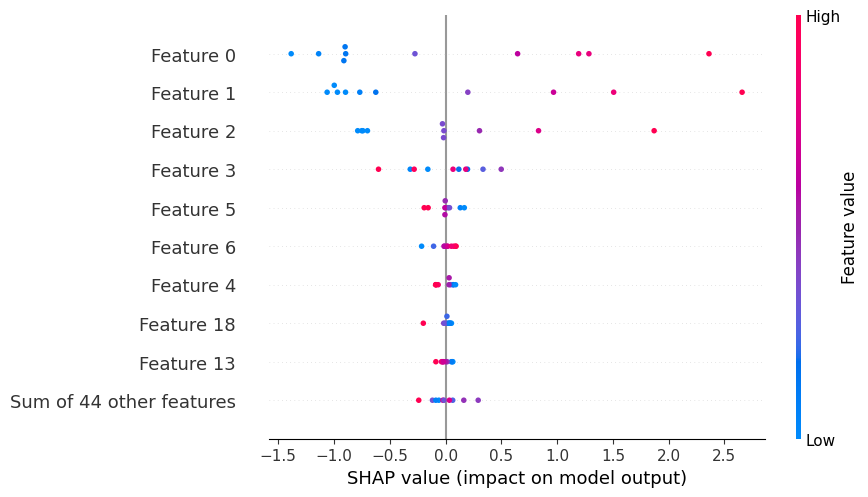


🧠 Layer Activations:


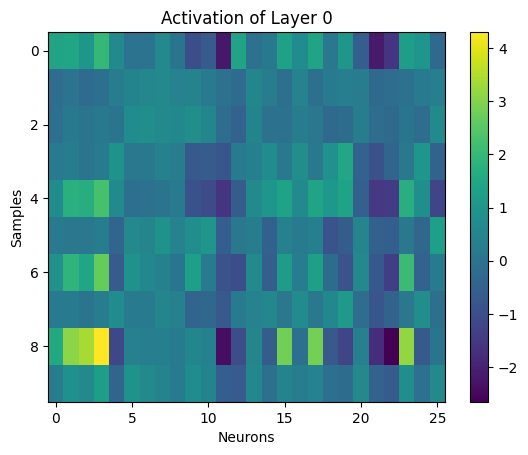

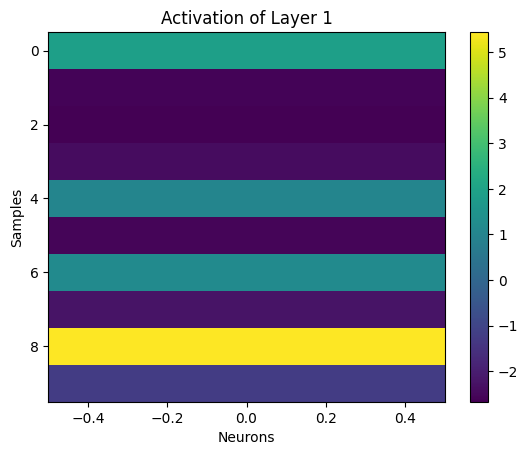


⚡ Integrated Gradients:


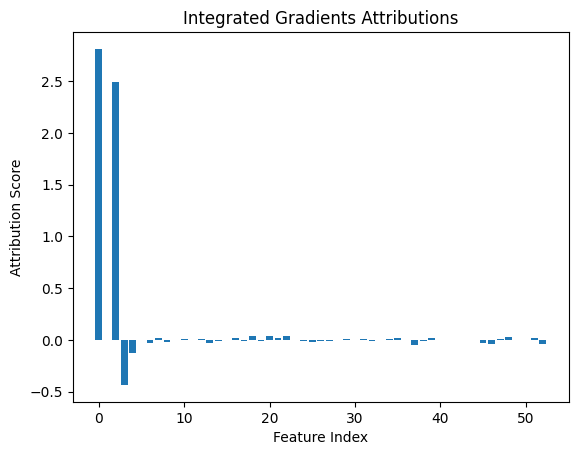


🔥 Grad-CAM (Trying all linear layers):
→ Layer 0


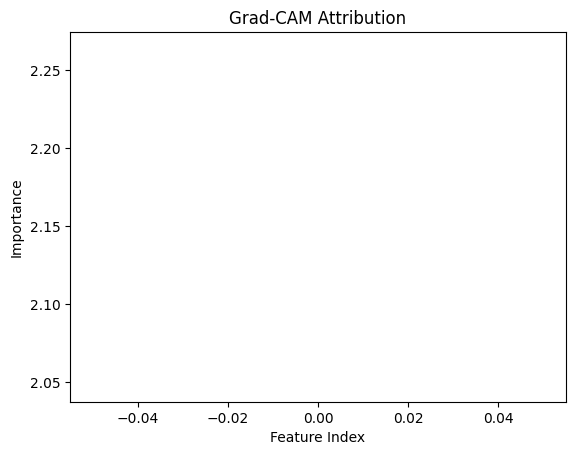

→ Layer 3
[Grad-CAM] Only 2 Linear layers found. Using last layer instead.


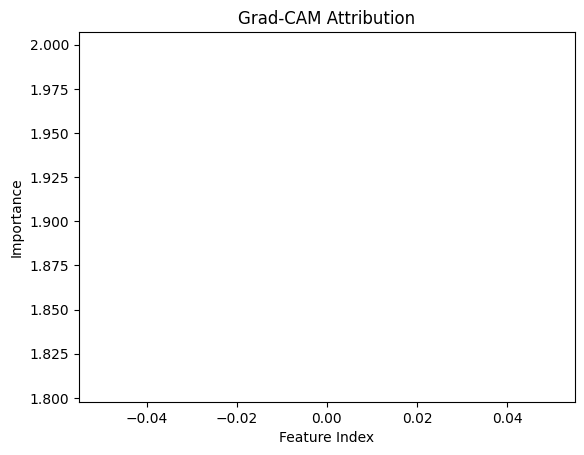

In [19]:
test_loader = DataLoader(test_dataset, batch_size=16)
run_explainability_analysis(trainer, test_loader, num_samples=10)

Layer (type:depth-idx)                   Output Shape              Param #
ProteinClassifier                        [1, 1]                    --
├─Sequential: 1-1                        [1, 1]                    --
│    └─Linear: 2-1                       [1, 24]                   1,200
│    └─ReLU: 2-2                         [1, 24]                   --
│    └─Dropout: 2-3                      [1, 24]                   --
│    └─Linear: 2-4                       [1, 1]                    25
Total params: 1,225
Trainable params: 1,225
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.01
Epoch 1, Training Loss: 0.8440, Validation Loss: 0.8238, Training Accuracy: 0.5116, Validation Accuracy: 0.5061
Epoch 2, Training Loss: 0.8311, Validation Loss: 0.8060, Training Accuracy: 0.5144, Validation Accuracy: 0.5000
Epoch 3, Training Loss: 0.8073, Validation Loss: 0.7890, Training Acc

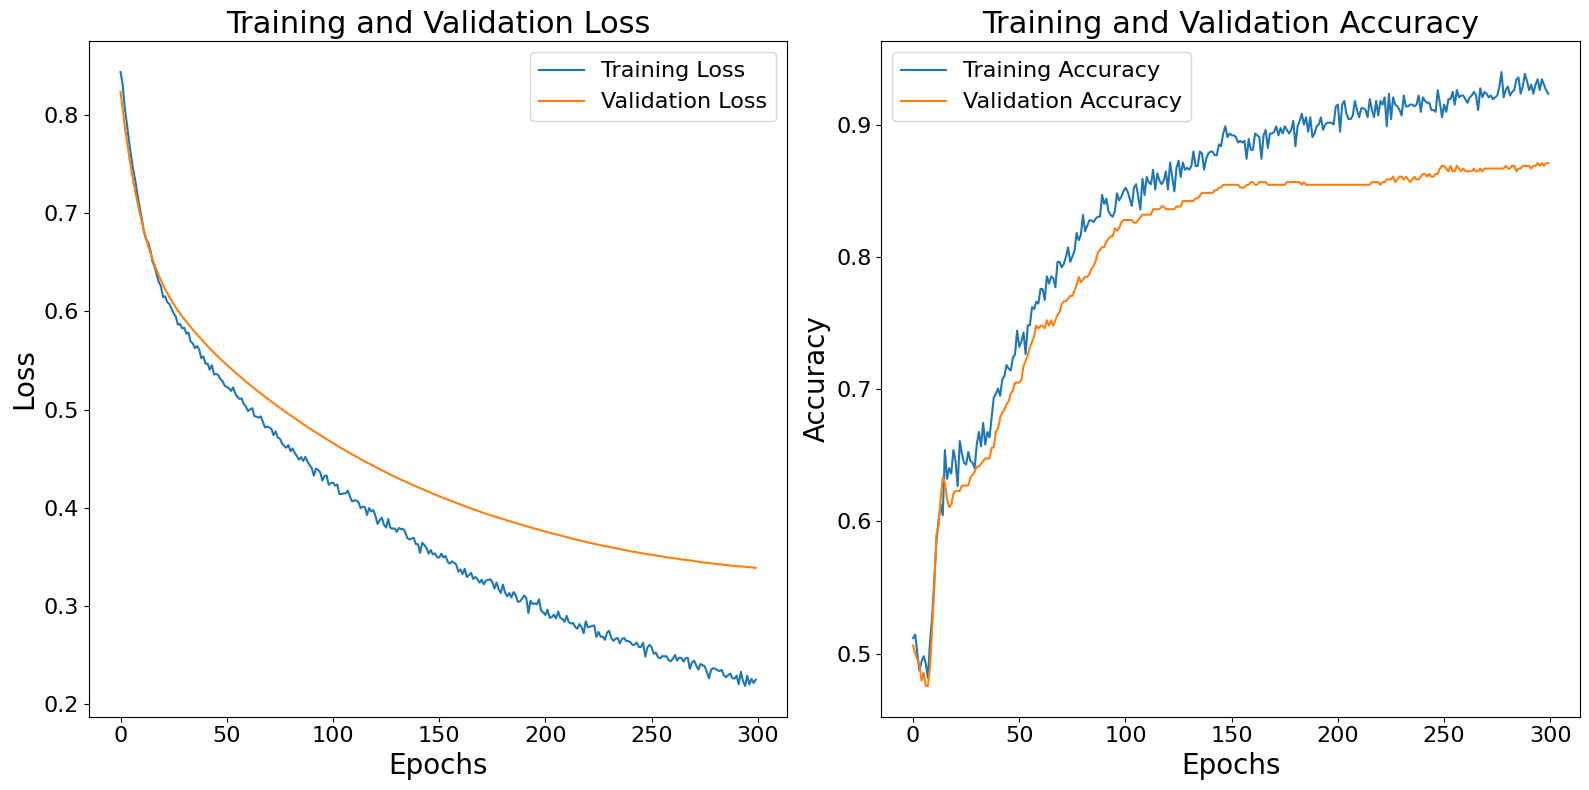

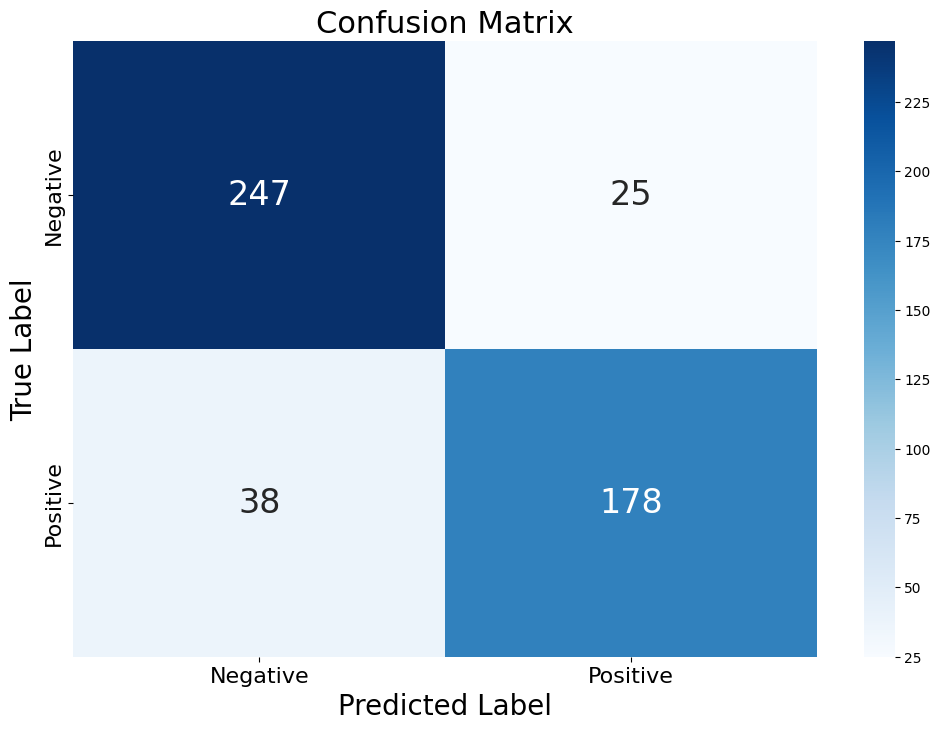


Métricas de Evaluación:
              precision    recall  f1-score   support

    Negative       0.87      0.91      0.89       272
    Positive       0.88      0.82      0.85       216

    accuracy                           0.87       488
   macro avg       0.87      0.87      0.87       488
weighted avg       0.87      0.87      0.87       488

Especificidad: 0.9081
Estadístico Kappa: 0.7367
✅ ProteinClassifier + Trainer test complete


In [16]:
train_model(data_att, num_epochs=300)

Layer (type:depth-idx)                   Output Shape              Param #
ProteinClassifier                        [1, 1]                    --
├─Sequential: 1-1                        [1, 1]                    --
│    └─Linear: 2-1                       [1, 49]                   4,900
│    └─ReLU: 2-2                         [1, 49]                   --
│    └─Dropout: 2-3                      [1, 49]                   --
│    └─Linear: 2-4                       [1, 1]                    50
Total params: 4,950
Trainable params: 4,950
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.02
Estimated Total Size (MB): 0.02
Epoch 1, Training Loss: 0.7704, Validation Loss: 0.7497, Training Accuracy: 0.4610, Validation Accuracy: 0.4898
Epoch 2, Training Loss: 0.7526, Validation Loss: 0.7329, Training Accuracy: 0.4583, Validation Accuracy: 0.4795
Epoch 3, Training Loss: 0.7372, Validation Loss: 0.7190, Training Acc

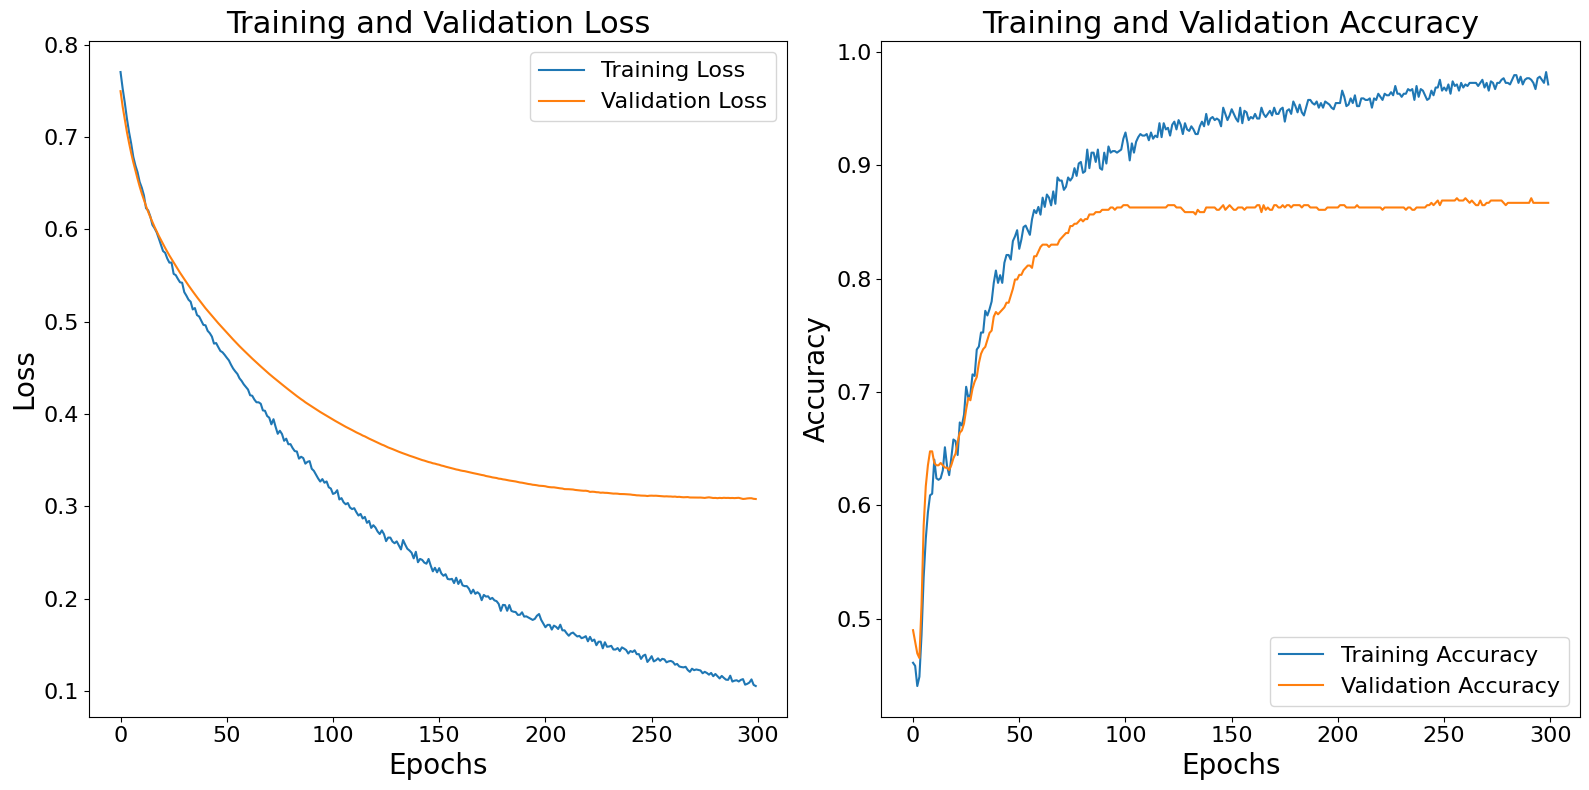

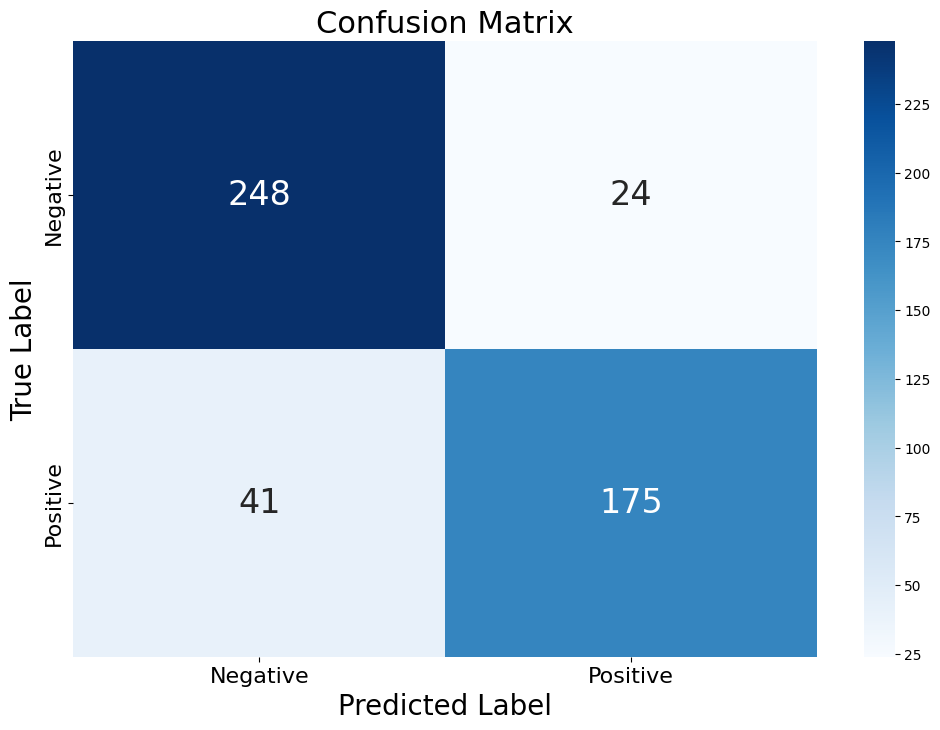


Métricas de Evaluación:
              precision    recall  f1-score   support

    Negative       0.86      0.91      0.88       272
    Positive       0.88      0.81      0.84       216

    accuracy                           0.87       488
   macro avg       0.87      0.86      0.86       488
weighted avg       0.87      0.87      0.87       488

Especificidad: 0.9118
Estadístico Kappa: 0.7278
✅ ProteinClassifier + Trainer test complete


In [17]:
train_model(data_comb, num_epochs=300)